### BACKGROUND <a name='background'></a>
A LSOA is a census area containing 1,000 to 3,000 people. SOAs were designed to improve the reporting of small area statistics and are built up from groups of output areas
(OA). Statistics for lower layer super output areas (LSOA) and middle layer super output areas (MSOA) were
originally released in 2004 for England and Wales. Scotland also released statistics for data zones (DZ), that
were equivalent to LSOAs, in 2004 and intermediate geographies (IG),  that were equivalent to MSOAs, in 2005.
Northern Ireland introduced LSOAs in 2005 but do not have an MSOA geography.link dataset:[di sini](https://www.kaggle.com/datasets/jboysen/london-crime)


### ABOUT THE DATASET <a name='about_the_dataset'></a>
This data, represented by the file `london_crime_by_lsoa.csv`, covers the number of criminal reports by month,
LSOA borough, and major/minor category from Jan 2008-Dec 2016 in Greater London (central London and the
surrounding metropolitan area) by providing 13,490,604 samples with 7 variables
each.

The variables `lsoa_code`, `borough`, `major_category`, `minor_category`, `year` and `month` are **categorical**
variables, while `value` is a **discrete numerical** variable. The variables' meanings are the followings:

* `lsoa_code`: code for Lower Super Output Area in Greater London;
* `borough`: common name for London borough;
* `major_category`: high level categorization of crime;
* `minor_category`: low level categorization of crime within major category;
* `year`: year of reported counts, 2008-2016;
* `month`: month of reported counts, 1-12;
* `value`: monthly reported count of categorical crime in given borough;

## Import Libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from PIL import Image as img
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from scipy import stats

## Loading Dataset

In [ ]:
df_crimes= pd.read_csv('./Dataset/london_crime_by_lsoa.csv', dtype={'year':str, 'month':str})
print("Dataset read into pandas dataframe!")

Dataset read into pandas dataframe!


In [ ]:
df_crimes.sample(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
6848754,E01000207,Barnet,Violence Against the Person,Harassment,0,2011,8
7273908,E01003915,Southwark,Drugs,Drug Trafficking,0,2012,6
3430493,E01002662,Hounslow,Theft and Handling,Theft/Taking of Pedal Cycle,1,2012,7
7662189,E01032639,Southwark,Drugs,Drug Trafficking,0,2012,11
5142494,E01000083,Barking and Dagenham,Theft and Handling,Motor Vehicle Interference & Tampering,0,2016,6
6152883,E01003132,Lambeth,Theft and Handling,Theft From Shops,0,2013,8
8483247,E01000371,Bexley,Theft and Handling,Handling Stolen Goods,0,2008,8
11361800,E01003585,Newham,Violence Against the Person,Assault with Injury,1,2012,12
13396496,E01001078,Croydon,Burglary,Burglary in Other Buildings,0,2014,7
9660673,E01000029,Barking and Dagenham,Violence Against the Person,Assault with Injury,0,2014,5


In [ ]:
df_crimes.dtypes

lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year              object
month             object
dtype: object

In [ ]:
df_crimes.describe(include= 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180
year,13490604,9,2016,1498956
month,13490604,12,11,1124217


In [ ]:
df_crimes['year'].unique()

array(['2016', '2015', '2008', '2012', '2010', '2013', '2014', '2011',
       '2009'], dtype=object)

In [ ]:
summary_num= df_crimes.describe(include=np.number)
summary_num

,value
count,1.349060e+07
mean,4.779444e-01
std,1.771513e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,3.090000e+02


In [ ]:
print('MIN: {}, MAX: {}, UNIQUE_VALUES: {}, MODE: {}'.format(
    df_crimes['value'].min(),
    df_crimes['value'].max(),
    df_crimes['value'].nunique(),
    stats.mode(df_crimes['value'])
))

MIN: 0, MAX: 309, UNIQUE_VALUES: 247, MODE: ModeResult(mode=0, count=10071505)


### Analisis Dasar
Dataset memiliki 7 Atribut/feature dengan jumlah borough 33, terdapat 9 kategori major dan 32 jenis kejahatan kategori minor dari periode tahun 2008 - 2016. variable value merupakan satu satunya variabel numeric pada dataset. var value mewakili jumlah laporan bulanan kategori kejahatan pada setiap wilayah dengan unique valuenya 247, maximal value 309 dan minimal value adalah 0

### Pie Chart
Question: Which number of major category of crime are most in London

In [ ]:
df_major_category= df_crimes.groupby('major_category', axis=0).sum()
df_major_category

C:\Users\Maher notebook\AppData\Local\Temp\ipykernel_8680\1068688500.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_major_category= df_crimes.groupby('major_category', axis=0).sum()


,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


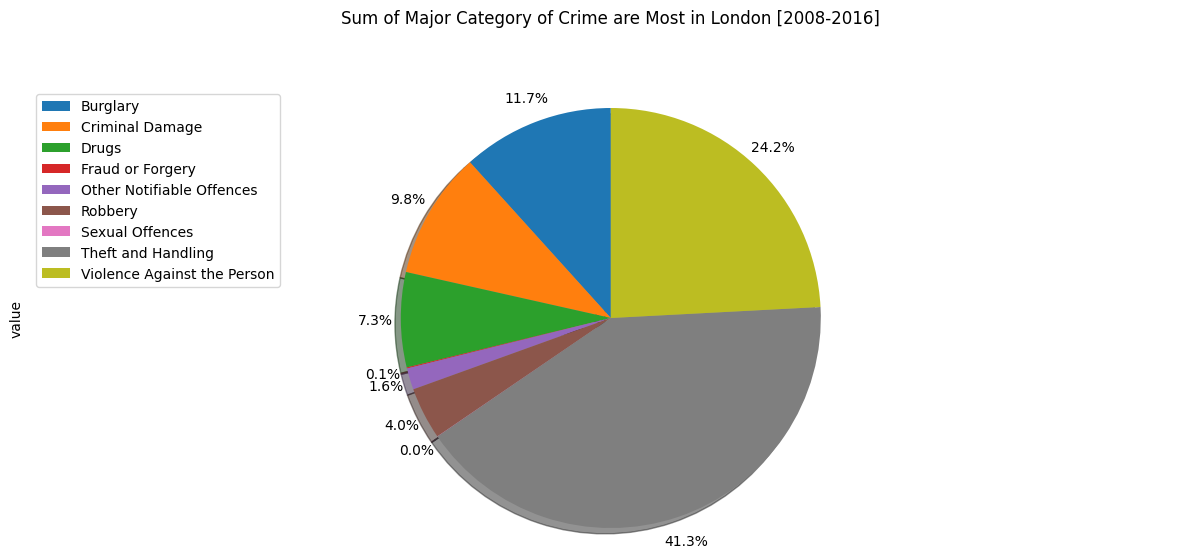

In [ ]:
df_major_category['value'].plot(kind='pie',
                           figsize = (15,6),
                           autopct= '%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance= 1.12,

                        )
plt.title("Sum of Major Category of Crime are Most in London [2008-2016]", y=1.12)
plt.axis('equal')
plt.legend(labels=df_major_category.index, loc='upper left')
plt.show()

Pada Pie chart diatas kita dapat melihat bahwa kejahatan dengan jumlah tertinggi pada major crime category adalah Theft and Handling dengan persentase 41.3%, dan diikuti Violence Against the Person yang mengambil tempat kedua dengan persentase 24.2%.

Question :
- Jumlah Kejahatan pada major category di Kota London dari tahun 2008 -2016
- Jumlah kejahatan pada minor category di Kota London dari tahun 2008 -2016


In [ ]:
major_ctg= df_crimes.major_category.value_counts()
major_ctg

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

<Axes: title={'center': 'Sum of Crimes at Major Category in London from 2008-2016'}>

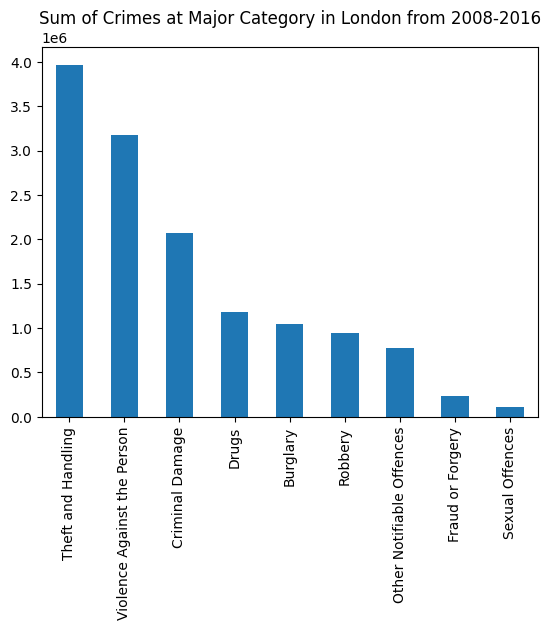

In [ ]:
major_ctg.plot.bar(title = "Sum of Crimes at Major Category in London from 2008-2016", fontsize=10)

In [ ]:
minor_ctg= df_crimes.minor_category.value_counts(ascending=False)
minor_ctg

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

<Axes: title={'center': 'Sum of Crimes at Minor Category in London from 2008-2016'}>

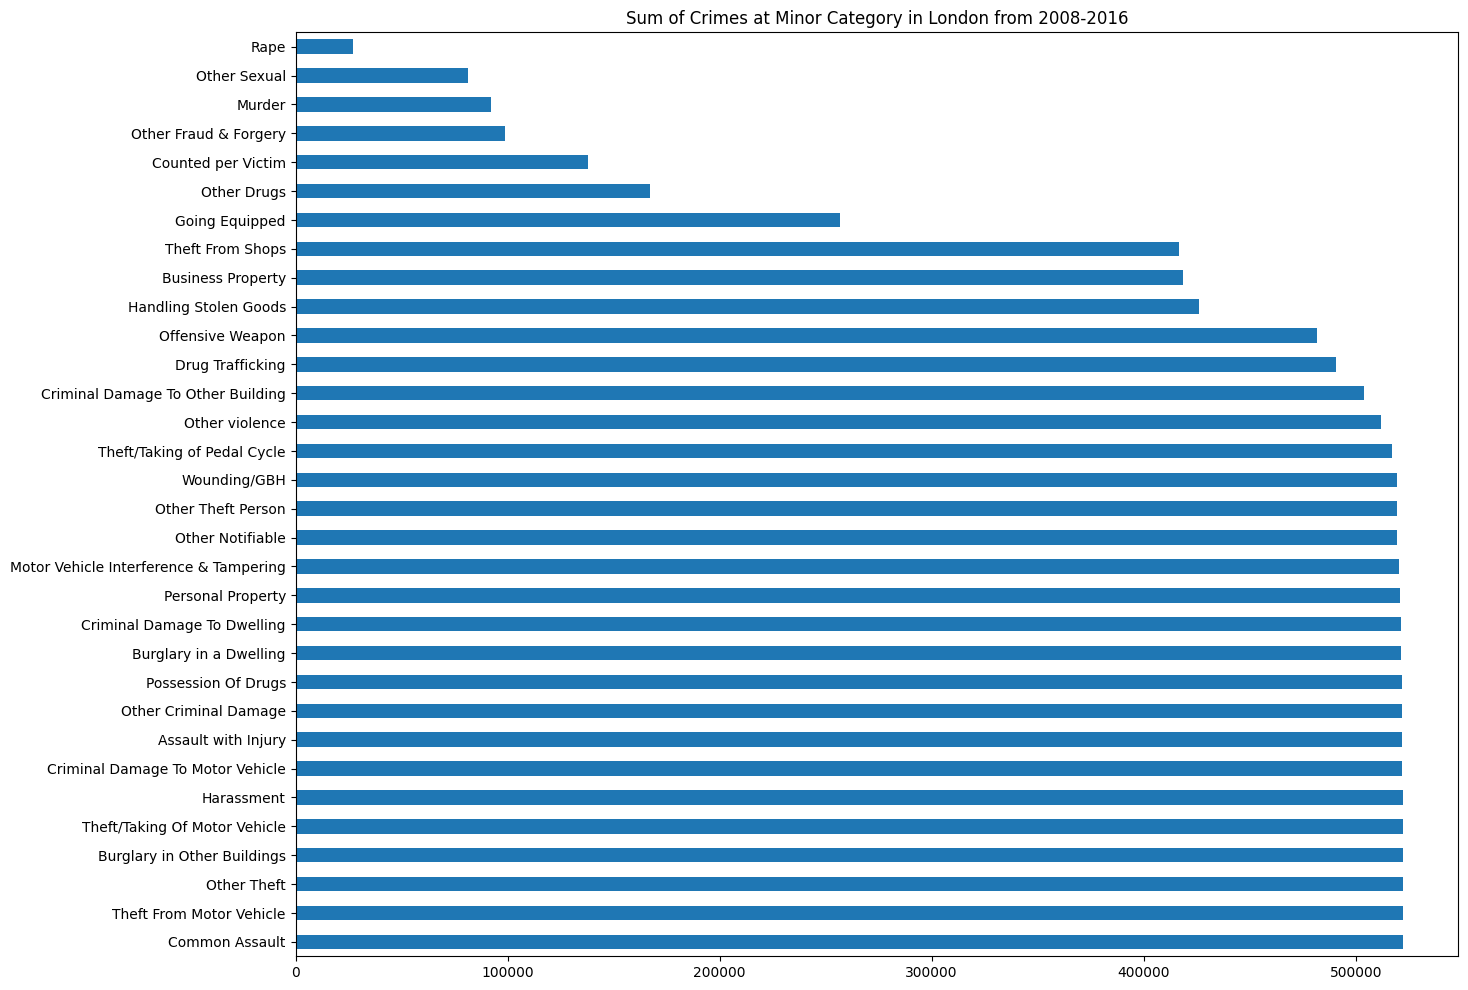

In [ ]:
minor_ctg.plot.barh(figsize=(15, 12),
                    title = "Sum of Crimes at Minor Category in London from 2008-2016")

Pada Bar chart diatas menampilkan hasil bahwa pencurian kendaraan bermotor (Theft from motor Vehicle), serangan ditempat umum (common assault) dan pencurian lainnya menjadi kejahatan kategori minor terbanyak dengan total kasus 522180 dan jumlah kejahatan kategori minor paling sedikit kasusnya adalah Pemerkosaan (Rape) dengan total kasus 27000 per tahun 2008 - 2016

### Crimes per Year, Crimes per Month

In [ ]:
crimesPerYear, crimesPerMonth= {},{}
# months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec']
months=['1','2','3','4','5','6','7','8','9','10','11','12']

for year in np.sort(df_crimes['year'].unique()):
    crimesY=df_crimes.loc[(df_crimes['year']==year)]
    crimesPerYear[year]=sum(crimesY['value'])
    crimesPerMonth[year]=[]

    for month in months:
        crimesM= crimesY.loc[crimesY['month']==month]
        crimesPerMonth[year].append(sum(crimesM['value']))

valSort= list(crimesPerYear.values())
valSort.sort()
cpmMatrix = np.mean([crimesPerMonth[key] for key in crimesPerYear.keys()], axis=0)


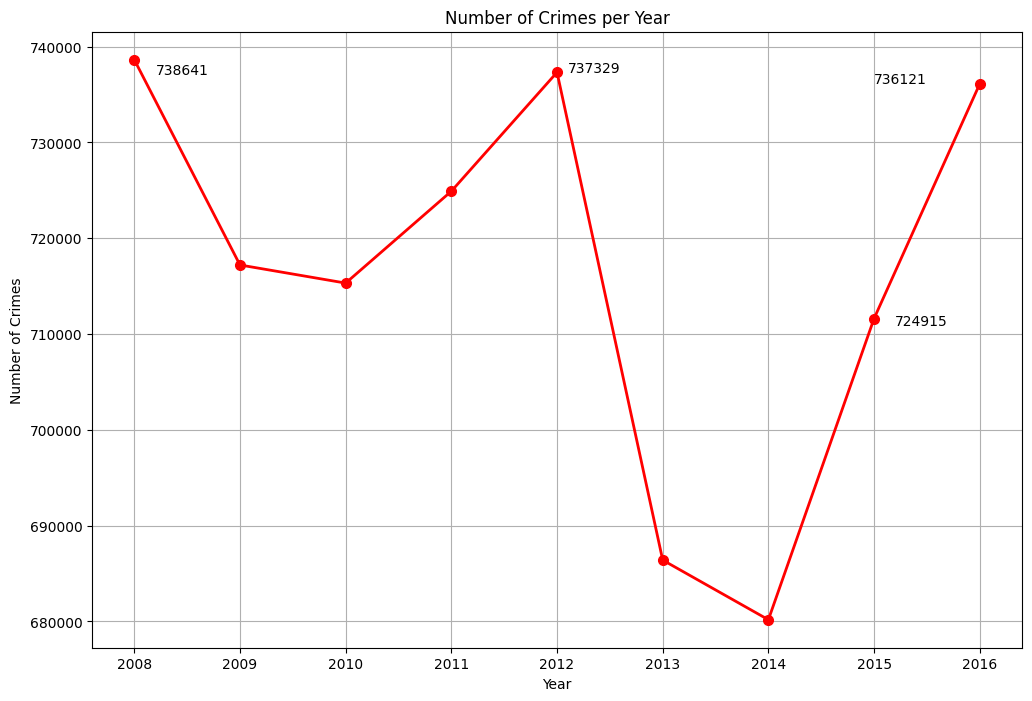

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(len(crimesPerYear.keys())), list(crimesPerYear.values()),
        linewidth= 2, color='red', marker='o', markersize=7.0)
plt.annotate(valSort[-1], (0.2, valSort[-1] - 1500))
plt.annotate(valSort[-2], (4.1, valSort[-2]))
plt.annotate(valSort[-3], (7., valSort[-3]))
plt.annotate(valSort[-4], (7.2, valSort[-7]-700))

plt.xticks(range(len(crimesPerYear.keys())), crimesPerYear.keys())
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')
plt.grid()

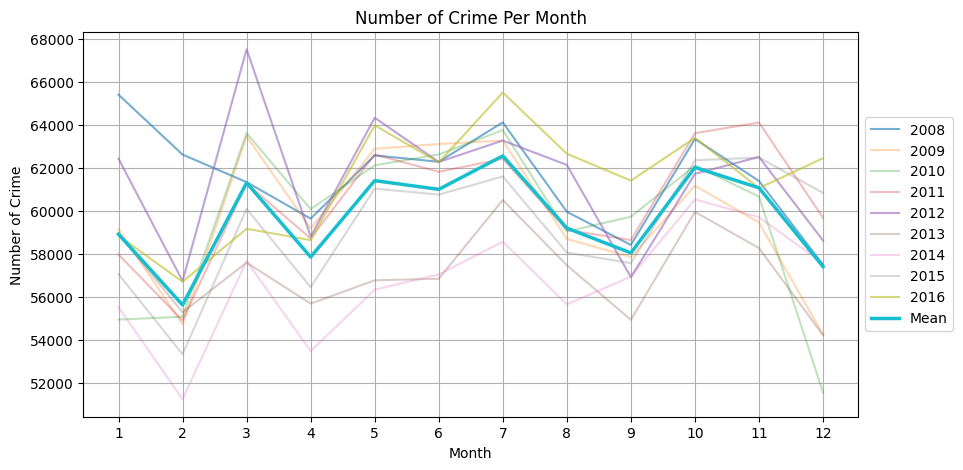

In [ ]:
plt.figure(figsize=(10,5))

for year in crimesPerMonth.keys():
    if int(year) in [2008,2012,2016]:
        plt.plot(range(len(crimesPerMonth[year])), crimesPerMonth[year], label=year, alpha=0.6)
    else:
        plt.plot(range(len(crimesPerMonth[year])), crimesPerMonth[year], label=year, alpha=0.3)
plt.plot(range(12), cpmMatrix, label='Mean', linewidth=2.5)
plt.xticks(range(len(df_crimes['month'].unique())), months)
plt.xlabel("Month")
plt.ylabel("Number of Crime")
plt.title("Number of Crime Per Month")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Scatter Plot
Question : Number of Crime in each month in the year 2014

In [ ]:
year_2014= df_crimes.loc[df_crimes['year']=='2014']
months = year_2014['month'].unique()
months.sort()

sum_months= year_2014.groupby(['month']).sum()
total= sum_months['value'].to_numpy()
name_of_month= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec']
print("Number of Crime in each month in the year 2014")
print(name_of_month)
print(total)
n= np.arange(len(months))
x_range= range(1,13)


Number of Crime in each month in the year 2014
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec']
[55515 60537 59704 57565 51222 57669 53467 56327 57039 58564 55641 56933]


C:\Users\Maher notebook\AppData\Local\Temp\ipykernel_8680\3201466792.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_months= year_2014.groupby(['month']).sum()


C:\Users\Maher notebook\AppData\Local\Temp\ipykernel_8680\2561107258.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_range, total, s=50, c='red',cmap='varidis',alpha=1)


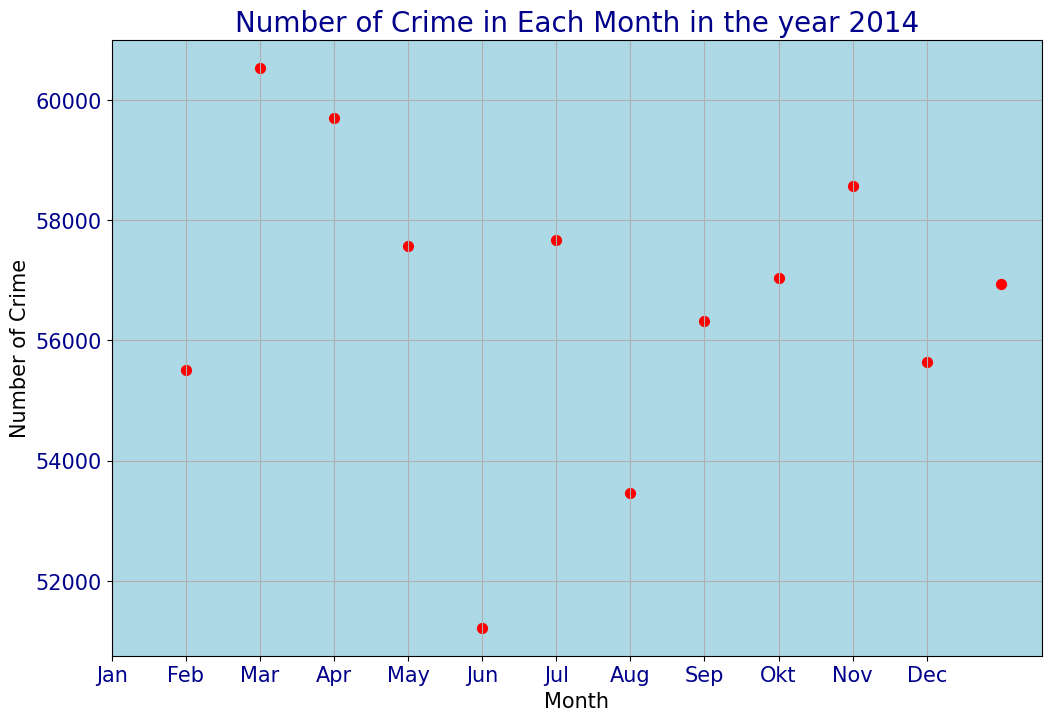

In [ ]:
plt.figure(figsize=(12,8))
ax= plt.axes()
ax.set_facecolor('lightblue')
plt.scatter(x_range, total, s=50, c='red',cmap='varidis',alpha=1)
plt.title("Number of Crime in Each Month in the year 2014", color= 'darkblue', fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Crime", fontsize=15)
plt.xticks(n, name_of_month)
plt.xticks(color='darkblue', fontsize=15)
plt.yticks(color='darkblue', fontsize=15)
plt.grid()

In [ ]:
df_crimes_val = df_crimes.loc[df_crimes['value']!=0]
df_crimes_val.describe(include=object)

,lsoa_code,borough,major_category,minor_category,year,month
count,3419099,3419099,3419099,3419099,3419099,3419099
unique,4835,33,9,32,9,12
top,E01004734,Lambeth,Theft and Handling,Other Theft,2016,7
freq,2387,152784,1136994,297281,392042,296151


# Folium maps

C:\Users\Maher notebook\AppData\Local\Temp\ipykernel_8680\1961633885.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(scalarMap, shrink=0.5)


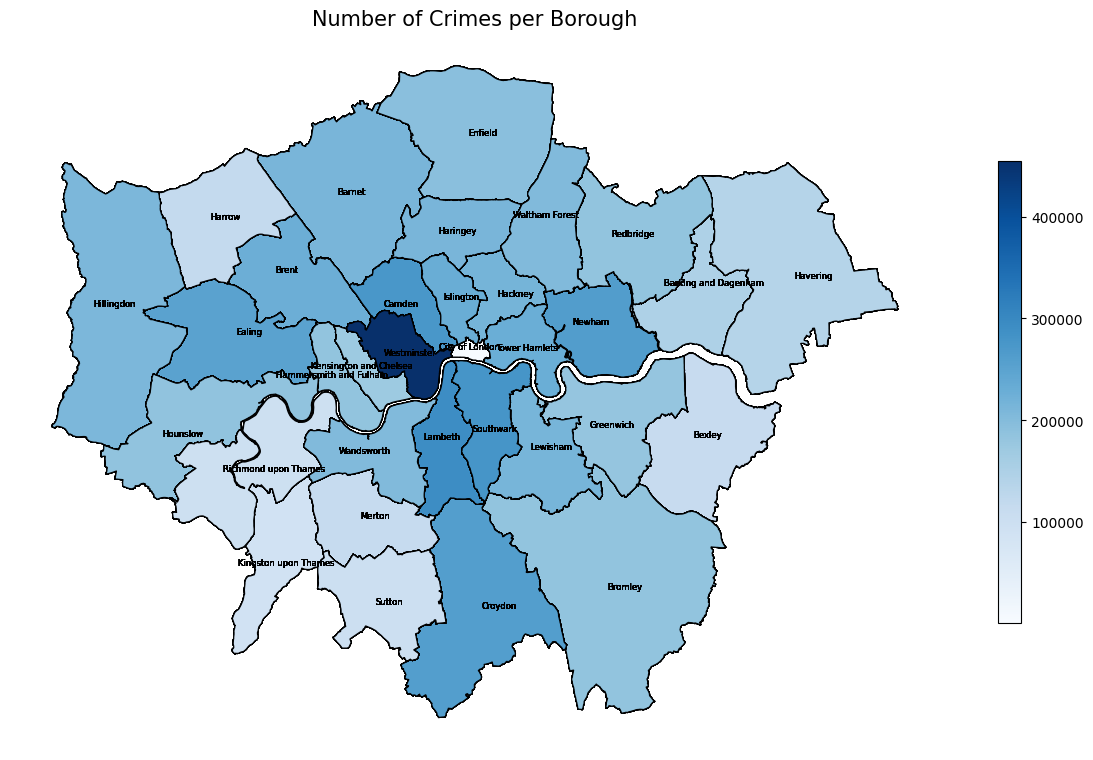

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Membaca file shapefile
london_map = gpd.read_file('./Dataset/london_borough_excluding_mhw.zip')

# Asumsi memiliki dataframe df_crimes_val dengan kolom 'borough' dan 'value'
crimesPerBorough = df_crimes_val.groupby('borough')['value'].sum()

# Menggabungkan data shapefile dengan jumlah kejahatan per borough
joined = london_map.set_index('name').join(crimesPerBorough)

# Menghitung koordinat untuk label
joined['coords'] = joined['geometry'].apply(lambda x: x.representative_point().coords[:])
joined['coords'] = [coords[0] for coords in joined['coords']]

# Membuat visualisasi
fig, ax = plt.subplots(figsize=(15, 12))
joined.plot(column='value', cmap='Blues', linewidth=0.9, edgecolor='black', ax=ax)
ax.axis('off')
ax.set_title('Number of Crimes per Borough', fontsize=15)

# Menambahkan colorbar
scalarMap = plt.cm.ScalarMappable(cmap='Blues',
                                 norm=plt.Normalize(vmin=min(joined['value']),
                                                    vmax=max(joined['value'])))
scalarMap._A = []
cbar = plt.colorbar(scalarMap, shrink=0.5)

# Menambahkan label untuk setiap borough
for idx, row in joined.iterrows():
    plt.annotate(text=idx, xy=row['coords'], horizontalalignment='center', fontsize=6)

plt.show()



Dapat dilihat bahwa pada visualisasi geografik menyatakan apa yang telah diketahui sejauh ini Westminster dikonfirmasi sebagai wilayah yang memiliki aktifitas kriminal paling banyak dibanding kan dengan borough lainnya. ditandai dengan warna biru tua yang berdasarkan pada bar index disamping map memiliki jumlah > 400000 cases.

# WordCloud
membuat wordcloud berdasarkan data kejahatan perborough

In [ ]:
freq_borough = df_crimes['borough']
freq_borough

0              Croydon
1            Greenwich
2              Bromley
3            Redbridge
4           Wandsworth
               ...    
13490599         Brent
13490600    Hillingdon
13490601        Sutton
13490602       Croydon
13490603        Merton
Name: borough, Length: 13490604, dtype: object

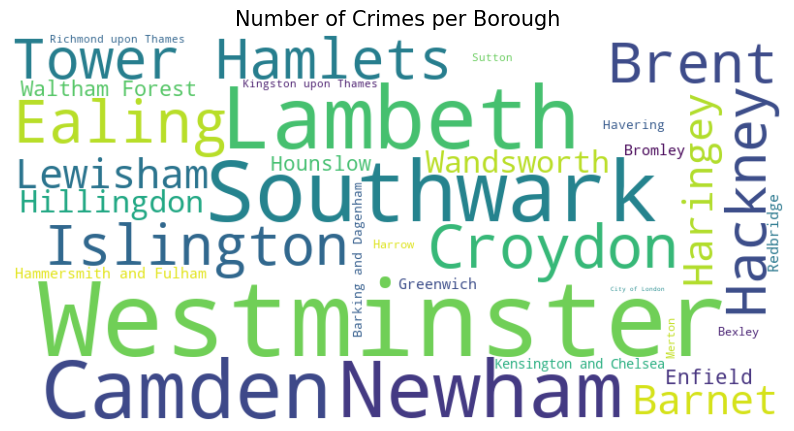

In [ ]:
from wordcloud import WordCloud

# Menggunakan data crimesPerBorough untuk membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(crimesPerBorough)

# Plotting word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Number of Crimes per Borough', fontsize=15)
plt.show()


Pada WordCloud yang dihasilkan oleh kode di atas, kita dapat melihat bahwa ukuran font dari setiap nama borough bervariasi. Ukuran font ini sebanding dengan jumlah kejahatan yang terjadi di masing-masing borough. Dengan demikian, borough dengan ukuran font yang lebih besar—seperti misalnya Westminster,southwark, atau camden—menunjukkan bahwa tingkat kejahatan di borough-borough tersebut lebih tinggi dibandingkan dengan borough lainnya. Hal ini memberikan gambaran cepat dan intuitif tentang daerah mana yang cenderung memiliki tingkat kejahatan yang lebih tinggi dan mungkin memerlukan perhatian lebih dari pihak berwenang.